<a href="https://colab.research.google.com/github/Sidharth-satheeshkumar/EDA-Project-on-Facebook-Data/blob/main/Faebook_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

*   The main goal of this project is to perform exploratory data analysis on facebook data which consist of the information about facebook users and the details about their facebook usage.
*   The dataset used for this project is collected from the Kaggle.



# Procedure




1.   Understand the features/columns in the dataset.
2.   Handling missing values in the table.
3. Interpret the insights by using certain functions/techniques.
4.Check whether any mutual relationship/correlation among the features.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/pseudo_facebook.csv')

In [ ]:
data.head(12)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [ ]:
data.columns  # Fetching the features from the dataset

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

# Feature Description



1.   userid : - Facebook ID of each user in the dataset.
2.   age    :-  Age of the user.
3.  dob_day :-  Day of birth of the user.
4. dob_year :-  Year of birth of the user.
5. dob_month :- Month of birth of the user.
6. gender   :- The gender
7. tenure   :- The total working days of each user who spent for their job.
8. friend_count :- Total number of friends of each user.
9. friendships_initiated :- Friendship request initiated by each user in numbers.
10.likes :- Total number of likes given to other users by each user.
11.likes_received :- Total number of likes recieved to each corresponding user.
12.mobile_likes :- Total number of likes given to other users by each user through their facebook app in mobilephones.
13.mobile_likes_received :- Total number of likes recieved to each user through their facebook app in mobilephones.
14.www_likes :- Total number of likes given to other users by each user through the facebook web.
15. www_likes_received :- Total number of likes recieved to each user through
the facebook web.


# Handling Missing Values

In [ ]:
for i in data.columns:
    print(i,':',data[i].isna().sum())

userid : 0
age : 0
dob_day : 0
dob_year : 0
dob_month : 0
gender : 175
tenure : 2
friend_count : 0
friendships_initiated : 0
likes : 0
likes_received : 0
mobile_likes : 0
mobile_likes_received : 0
www_likes : 0
www_likes_received : 0


Handling Tenure column

In [ ]:
data['tenure'].mean()


537.8873748750012

In [ ]:
data['tenure'].fillna(value=537.8873748750012,inplace=True) # Substituting the mean value of that column to the missing entries of that particular column

Handling gender column

In [ ]:
data['gender'].isna().sum()

175

In [ ]:
new_data=data.dropna(axis=0)  # dropping the complete null values from the dataset

In [ ]:
new_data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756







*   .Tenure column contains the total number of working days of each facebook user
*    We'll convert these days values to year value for better understanding





In [ ]:
new_data['tenure']=new_data['tenure'].map(lambda x:round(x/365))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,1,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,1,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,1,2560,185,4506,6516,4506,5760,0,756


In [ ]:
new_data.shape

(98828, 15)

In [ ]:
new_data[new_data['gender']=='male'].shape  # Identify the total rows of male users

(58574, 15)

In [ ]:
new_data[new_data['gender']=='female'].shape   #  Identify the total rows of female users

(40254, 15)



*   Inorder to find the facebook usage among men and women we categorize the gender feature/column into 'male' and 'female' and find the overall behaviour of each corresponding gender.

*   There are 58574 entries of male users and 40254 entries of female users in the whole dataset.
*  The total number of male users in Facebook is 18.5% greater than the number of female users.







 



# Splitting the gender feature

*   To find the exact pattern among the users we split the gender feature into male and female and store each gender in seperate dataframes.




Average of each selected feature of male users.

In [ ]:
male_data=new_data[new_data['gender']=='male']

In [ ]:
average=[]
columns =['tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']
for i in columns:
  average.append(male_data[i].mean())


In [ ]:
np.array(average)

array([  1.36224263, 165.03545942, 103.06659952,  84.67789463,
        67.91154779,  60.26132755,  40.83301465,  24.41655001,
        27.07853314])

In [ ]:
male_data=pd.DataFrame(data=average,index=['tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received'],columns=['Average_value'])

Average of each selected feature of female users.

In [ ]:
female_data=new_data[new_data['gender']=='female']

In [ ]:
average=[]
columns =['tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received']
for i in columns:
  average.append(female_data[i].mean())

In [ ]:
np.array(average) # converting the list to array for applying advanced functions in future

array([  1.60282208, 241.96994088, 113.89909077, 260.05132409,
       251.43543499, 172.91292791, 147.10088438,  87.13829682,
       104.33445123])

In [ ]:
female_data=pd.DataFrame(data=average,index=['tenure','friend_count','friendships_initiated','likes','likes_received','mobile_likes','mobile_likes_received','www_likes','www_likes_received'],columns=['Average_value'])

In [ ]:
male_data

,Average_value
tenure,1.362243
friend_count,165.035459
friendships_initiated,103.066600
likes,84.677895
likes_received,67.911548
mobile_likes,60.261328
mobile_likes_received,40.833015
www_likes,24.416550
www_likes_received,27.078533


In [ ]:
female_data

,Average_value
tenure,1.602822
friend_count,241.969941
friendships_initiated,113.899091
likes,260.051324
likes_received,251.435435
mobile_likes,172.912928
mobile_likes_received,147.100884
www_likes,87.138297
www_likes_received,104.334451


# Interpretation

1.   The above two tables show the average values of each selected features of men and women respectively.
2.   After removing the null entries from the dataset the total number of men and women in the dataset are 58574,40252 respectively.
3. By considering the tables male_data,female_data it shows that the social media usage among women is much higher than that of men.

1.   To prove this assumption we considering the 'friendships_initiated' and 'friend_count' features in male_data and female_data 
2.   16.69% of friends connected by men and 24.48%  friends connected by women from the overall facebookdata.

1.   10.42% of friendship initiated by men and 11.52% friendship initiated by women 
2.   8% of likes initiated by men and 26.31% of likes initiated by women.

1.   The last three points light to the behaviour of men and women towards the social media.
2.   From the given data men have more privacy concerns than women while using the social media.











## Finding the reason behind the pattern



*   Now we are actually move on to our core section.In this section we will look for any factor/factors that  actually affect on the behavioral pattern among men and women which is lastly discussed.


*   Using correlation plot/correlation matrix, we can find the mutual relationship(correaltion) among the features.
*   For better understanding here we are using heatmap.

*   Before moving to heatmap we are eliminating some features which are not needed/applicable for deploying heatmap.









In [ ]:
new_data.head()

## Features Elimination

*   userid (It's a number just denoting each user in the facebook)
*   dob_day,dob_year,dob_month (we have age as a seperate feature in our dataset. So there is no need of birth details.) 



In [ ]:
new_data=new_data.drop(columns=['userid','dob_day','dob_year','dob_month'])



*   Heatmap don't accept string values from the dataset.So to resolve this issue convert 'male','female' to numerical values in the gender column.




In [ ]:
gender_convert={'male':1,'female':2}
new_data['gender']=new_data['gender'].map(gender_convert)

In [ ]:
np.unique(new_data['gender'])

array([1, 2])

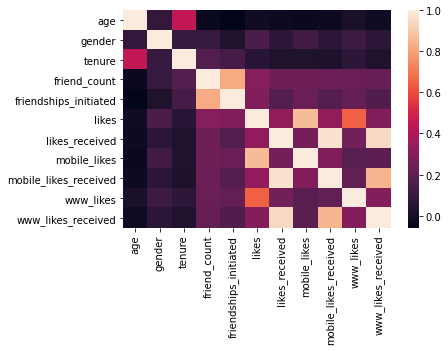

In [ ]:
import seaborn as sns



sns.heatmap(new_data.corr())



*   After creating the heatmap we don't get any vital information about the features and we will conclude with the interpretation result as we early discussed.




## References

*   Dataset :-https://www.kaggle.com/sheenabatra/facebook-data


*   Heatmap reference :-https://seaborn.pydata.org/generated/seaborn.heatmap.html






# **THANK YOU FOR YOUR TIME**